  <td>
    <a href="https://colab.research.google.com/github/marco-canas/innovaciones/blob/main/prop/unidad_didac/2_clasificacion/2_clasif_load_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>

# Clasificación binaria usando el dataset load_digits

### Objetivos

* Mostrar que sklearn tiene conjuntos de datos y clasificadores muy interesantes que permiten practicar la clasificación binaria.
* Mostrar que se pueden crear funciones en Python que permitan filtrar un conjunto de datos.
* Graficar usando matplotlib, versiones de las instancias de load_digits con solo dos atributos.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

[más sobre load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) 

[más sobre Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) 

In [2]:
def digits_dos_clases(i, j):
    """input: dos enteros: los dos dígitos a clasificar
       output: X array 2D instancias solo de i y de j. y array 1D etiquetas"""
    X, y = load_digits(return_X_y=True)
    return np.vstack([X[y==i], X[y==j]]), np.hstack([y[y==i], y[y==j]])

In [3]:
def digits_2D_arriba_abajo(X):
    """input: array 2D de instancias X de shape (n, 64)
       outpu: array 2D con solo dos atributos, shape de salida (n, 2)"""
    primera_col = X[:, :32].sum(axis=1).reshape(-1, 1)
    segunda_col = X[:, 32:].sum(axis=1).reshape(-1, 1)
    return np.hstack([primera_col, segunda_col])

In [4]:
def grafica_dos_clases(X, y, **kwargs):
    """grafica puntos en 2D diferenciando dos clases.
       input: X, y: instancias, etiquetas
       output: grafica sobre el sistema de ejes del momento"""
    etiquetas = list(set(y))
    label1, label2 = etiquetas[0], etiquetas[1]
    ax = plt.gca()
    ax.plot(X[:, 0][y==label1], X[:, 1][y==label1], 'bo', **kwargs)
    ax.plot(X[:, 0][y==label2], X[:, 1][y==label2], 'go', **kwargs)

In [5]:
def dibujaLinea(w, a, b):
    """dibuja linea separadora sobre sistema de ejes del momento
       input: w vector de pesos. a y b limites para el eje horizontal"""
    """a y b extremos del dominio"""
    w0, w1, w2 = w[0], w[1], w[2]
    ax = plt.gca()
    ax.plot([a, b], [-w0 / w2 -(w1 / w2) * a, -w0 / w2 -(w1 / w2) * b])

[ 1.000e+00  1.140e+03 -1.058e+03]


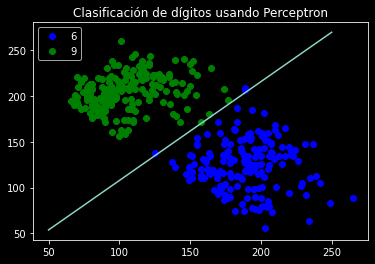

In [6]:
if __name__ == '__main__':


    plt.style.use("dark_background")
    i, j = 8, 3
    k, l = 6, 9
    X_8_3, y_8_3 = digits_dos_clases(i, j)
    X2D_8_3 = digits_2D_arriba_abajo(X_8_3)
    X_6_9, y_6_9 = digits_dos_clases(k, l)
    X2D_6_9 = digits_2D_arriba_abajo(X_6_9)

    clf = Perceptron()
    clf.fit(X2D_6_9, y_6_9)
    w1, w2 = clf.coef_[0]
    w0 = clf.intercept_[0]
    w = np.array([w0, w1, w2])
    print(w)
    ########### 8 contra 3 ###########
    # fig, ax = plt.subplots()
    # ax.set_title('Clasificación de dígitos usando Perceptron')
    # ax.legend([str(i), str(j)])
    # grafica_dos_clases(X2D_8_3, y_8_3)
    ########### 6 contra 9 ###########
    fig, ax = plt.subplots()
    ax.set_title('Clasificación de dígitos usando Perceptron')
    grafica_dos_clases(X2D_6_9, y_6_9)
    dibujaLinea(w, 50, 250)
    ax.legend([str(k), str(l)])
    plt.show()